In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

from scipy import stats

/var/folders/82/981937551rd3qhsg1c05yn4c0000gn/T/ipykernel_1419/920052441.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# definimos función test de normalidad
def normality_test(data):
    alpha = 0.05
    k2, p = stats.normaltest(data)
    if p > alpha:
        print("Distribución Normal")
    else:
        print("Distibución NO Normal")

In [3]:
# Load the data
df_resultado = pd.read_csv('../Data/df_resultado_var1(vec).csv')
df_com_up = pd.read_csv('../Data/df_com_up_var1.csv')
df_com_down = pd.read_csv('../Data/df_com_down_var1.csv')
df_estadisticas_up = pd.read_csv('../Data/df_estadisticas_up.csv', index_col=0)
df_estadisticas_down = pd.read_csv('../Data/df_estadisticas_down.csv', index_col=0)
df_estadisticas = pd.read_csv('../Data/df_estadisticas.csv', index_col=0)

In [4]:
df_resultado.head()

,prediction,year_2023,year_2024,month_3,month_5,month_6,month_7,month_8,month_9,month_10,...,CAT 797-F,CAT 798-AC,KOM-CHQ,KOM.960E5,Kom.930E-4,Kom.930E-4SE,Kom.930ER-MT,Kom.980E5,Komatsu AHS,status
0,125045.860483,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.276360,-0.21334,-0.575556,2.735792,-1.756724,0.476865,-0.035749,-2.98167,-0.101592,no_cumple
1,133832.488037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.276360,-0.21334,-0.575556,2.735792,0.191462,0.433466,-0.035749,-2.98167,-0.101592,no_cumple
2,142875.385561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.246214,-0.21334,-0.575556,2.735792,0.191462,0.607062,-0.035749,-2.98167,-0.101592,cumple
3,142712.362782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-2.914614,-0.21334,-0.575556,2.735792,-1.756724,0.520264,-0.035749,-2.98167,-0.101592,cumple
4,144366.298793,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-2.914614,-0.21334,-0.575556,2.735792,0.191462,0.520264,-0.035749,-2.98167,-0.101592,cumple


In [5]:
print(df_com_up.columns)

Index(['payload', 'year_2023', 'year_2024', 'month_3', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'day_2',
       'day_3', 'day_4', 'day_5', 'day_6', 'day_10', 'day_11', 'day_13',
       'day_15', 'day_16', 'day_17', 'day_20', 'day_21', 'day_22', 'day_23',
       'day_24', 'day_25', 'day_26', 'day_27', 'day_28', 'day_30', 'day_31',
       'shift_B', 'crew_E2', 'crew_E3', 'crew_E4', 'efectivo', 'mantencion',
       'mecanica', 'electrica', 'mant_excl', 'mec_excl', 'demora', 'r_noprg',
       'waiting', 'queued', 'distance_down_level', 'distance_up',
       'distance_up_level', 'expected_time', 'lift_down', 'lift_down_level',
       'lift_up', 'lift_up_level', 'travel_time', 'CAT 797-F', 'CAT 798-AC',
       'KOM-CHQ', 'KOM.960E5', 'Kom.930E-4', 'Kom.930E-4SE', 'Kom.930ER-MT',
       'Kom.980E5', 'Komatsu AHS', 'truck_avail', 'payload_validation'],
      dtype='object')


In [6]:
print(df_com_down.columns)

Index(['payload', 'year_2023', 'year_2024', 'month_3', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'day_2',
       'day_3', 'day_4', 'day_5', 'day_6', 'day_10', 'day_11', 'day_13',
       'day_15', 'day_16', 'day_17', 'day_20', 'day_21', 'day_22', 'day_23',
       'day_24', 'day_25', 'day_26', 'day_27', 'day_28', 'day_30', 'day_31',
       'shift_B', 'crew_E2', 'crew_E3', 'crew_E4', 'efectivo', 'mantencion',
       'mecanica', 'electrica', 'mant_excl', 'mec_excl', 'demora', 'r_noprg',
       'waiting', 'queued', 'distance_down_level', 'distance_up',
       'distance_up_level', 'expected_time', 'lift_down', 'lift_down_level',
       'lift_up', 'lift_up_level', 'travel_time', 'CAT 797-F', 'CAT 798-AC',
       'KOM-CHQ', 'KOM.960E5', 'Kom.930E-4', 'Kom.930E-4SE', 'Kom.930ER-MT',
       'Kom.980E5', 'Komatsu AHS', 'truck_avail', 'payload_validation'],
      dtype='object')


In [7]:
print(df_estadisticas_up.columns)

Index(['total', 'efectivo', 'mantencion', 'mecanica', 'electrica', 'mant_excl',
       'mec_excl', 'elec_excl', 'som_excl', 'demora', 'r_prog', 'r_noprg',
       'waiting', 'queued', 'payload', 'distance', 'distance_down',
       'distance_down_level', 'distance_up', 'distance_up_level',
       'expected_time', 'lift_down', 'lift_down_level', 'lift_up',
       'lift_up_level', 'travel_time', 'CAT 797-F', 'CAT 798-AC', 'KOM-CHQ',
       'KOM.960E5', 'Kom.930E-4', 'Kom.930E-4SE', 'Kom.930EN', 'Kom.930ER',
       'Kom.930ER-MT', 'Kom.980E5', 'Komatsu AHS', 'truck_avail'],
      dtype='object')


### **_1. Comparamos las Disponibilidades Originales vs las Disponibilidades Finales_**

In [8]:
# utilizamos las columnas de interés
resul_interes = pd.concat([df_resultado[['prediction','distance_up_level','status']],df_com_down[['truck_avail','payload']]],axis=1).copy()
resul_interes = resul_interes[resul_interes['status'] == 'cumple'][['prediction','distance_up_level','truck_avail','payload']]
resul_interes = resul_interes.drop_duplicates().reset_index(drop=True)
resul_interes = resul_interes.rename(columns={'distance_up_level':'dul_new','truck_avail':'ta_original'})
resul_interes

,prediction,dul_new,ta_original,payload
0,142875.385561,0.832416,0.742590,134593.450048
1,142712.362782,0.876929,0.720616,128529.373027
2,144366.298793,0.839472,0.765798,139994.273048
3,142367.244551,0.022343,0.712443,136659.349998
4,142389.202125,0.568855,0.734495,124766.023081
...,...,...,...,...
507,142384.270447,0.852178,0.779352,140439.223881
508,143286.544941,0.865869,0.758762,129308.830067
509,142463.281461,1.144239,0.744534,115542.896976
510,143442.730208,0.839472,0.749142,116144.915930


In [9]:
# des escalamos la variable dul_new
resul_interes['dul_new_normal'] = resul_interes['dul_new'] * df_estadisticas['distance_up_level']['std'] \
                          + df_estadisticas['distance_up_level']['mean']

In [10]:
# traemos las nuevas truck_avail
for i in range(len(resul_interes)):
    resul_interes.loc[i, 'ta_new'] = df_com_up.loc[df_com_up['distance_up_level'] == resul_interes.loc[i, 'dul_new'], 'truck_avail'].values[0]
    resul_interes.loc[i, 'ta_new'] 

In [11]:
# generamos columnas de diferencia
resul_interes['diff_ta'] = resul_interes['ta_new'] - resul_interes['ta_original'] # diferencia en truck_avail
resul_interes['diff_pay'] = resul_interes['prediction'] - resul_interes['payload'] # diferencia en payload
              

In [12]:
resul_interes

,prediction,dul_new,ta_original,payload,dul_new_normal,ta_new,diff_ta,diff_pay
0,142875.385561,0.832416,0.742590,134593.450048,5.150966e+06,0.774903,0.032312,8281.935513
1,142712.362782,0.876929,0.720616,128529.373027,5.193866e+06,0.773564,0.052948,14182.989755
2,144366.298793,0.839472,0.765798,139994.273048,5.157766e+06,0.787120,0.021321,4372.025745
3,142367.244551,0.022343,0.712443,136659.349998,4.370244e+06,0.751869,0.039426,5707.894553
4,142389.202125,0.568855,0.734495,124766.023081,4.896955e+06,0.742916,0.008421,17623.179044
...,...,...,...,...,...,...,...,...
507,142384.270447,0.852178,0.779352,140439.223881,5.170012e+06,0.787995,0.008643,1945.046566
508,143286.544941,0.865869,0.758762,129308.830067,5.183206e+06,0.801344,0.042582,13977.714873
509,142463.281461,1.144239,0.744534,115542.896976,5.451491e+06,0.822237,0.077703,26920.384484
510,143442.730208,0.839472,0.749142,116144.915930,5.157766e+06,0.787120,0.037978,27297.814278


<Axes: ylabel='Frequency'>

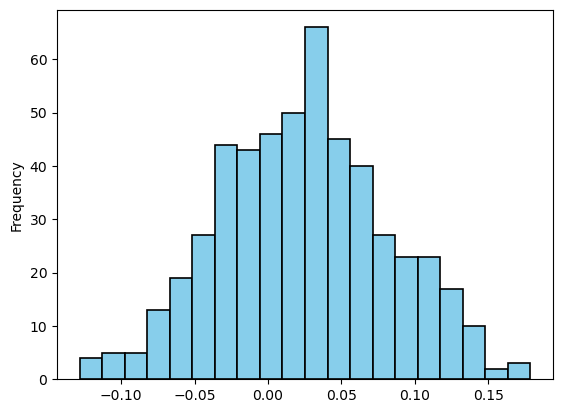

In [13]:
resul_interes['diff_ta'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black', linewidth=1.2)

In [14]:
resul_interes['diff_ta'][(resul_interes['diff_ta'] >=0) & (resul_interes['diff_ta'] <= 0.04)].value_counts().sum()

140

(0.0, 60.0)

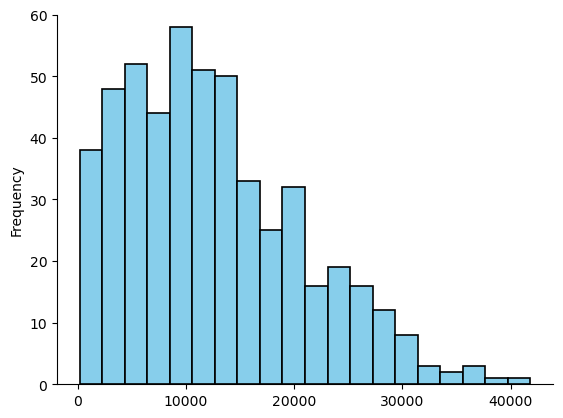

In [15]:
resul_interes['diff_pay'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black', linewidth=1.2)

# mejoramos la visualización
sns.despine()
plt.ylim(0, 60)

In [16]:
# nos concentramos en  los valores menores a 20_000
ta_foco = resul_interes[resul_interes['diff_pay'] < 20_000][['ta_original','ta_new']].copy()
ta_foco = ta_foco.reset_index(drop=True)
ta_foco

,ta_original,ta_new
0,0.742590,0.774903
1,0.720616,0.773564
2,0.765798,0.787120
3,0.712443,0.751869
4,0.734495,0.742916
...,...,...
411,0.776218,0.804739
412,0.800748,0.787120
413,0.750878,0.822237
414,0.779352,0.787995


In [17]:
normality_test(ta_foco['ta_new']), normality_test(ta_foco['ta_original'])

Distibución NO Normal
Distibución NO Normal


(None, None)

<Axes: xlabel='ta_new', ylabel='Count'>

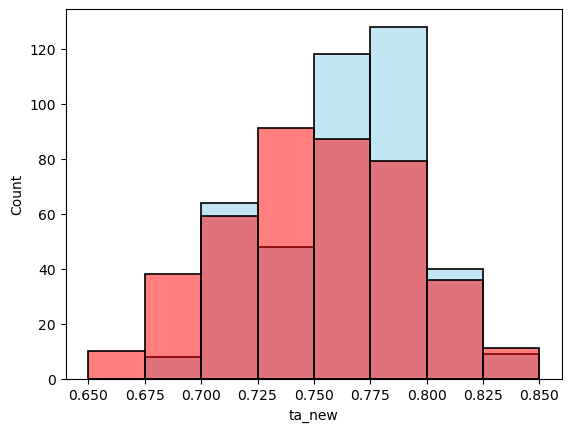

In [18]:
sns.histplot(ta_foco['ta_new'], 
             binwidth=0.025, 
             binrange=(0.650, 0.850),
             color='skyblue', 
             edgecolor='black', 
             linewidth=1.2,
             alpha=0.5)
sns.histplot(ta_foco['ta_original'], 
             binwidth=0.025, 
             binrange=(0.650, 0.850),
             color='red', 
             edgecolor='black', 
             linewidth=1.2,
             alpha=0.5)

In [19]:
# buscamos las coincidencias de las distance_up_level
coincidencia = df_com_up[df_com_up['distance_up_level'].isin(resul_interes['dul_new'])]
coincidencia = coincidencia[['distance_up_level','truck_avail']]
coincidencia = coincidencia.rename(columns={'truck_avail':'ta_new'})
coincidencia

,distance_up_level,ta_new
0,1.522682,0.841171
1,1.144239,0.822237
2,1.408364,0.807127
3,0.891184,0.818624
7,0.852178,0.787995
...,...,...
625,-1.034521,0.688605
627,-1.279719,0.747554
653,-0.842504,0.719127
690,-0.926930,0.761962


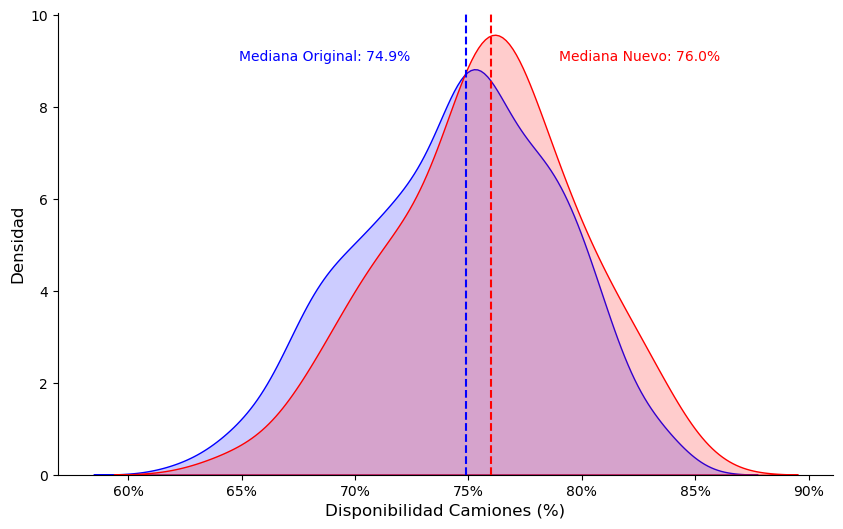

In [20]:
# Configuramos el tamaño de la figura
plt.figure(figsize=(10,6))

# Graficamos las distribuciones con estilos mejorados
sns.kdeplot(resul_interes['ta_original'], label='Original', color='blue', linewidth=1, fill=True, alpha=0.2)
sns.kdeplot(coincidencia['ta_new'], label='Nuevo', color='red', linewidth=1, fill=True, alpha=0.2)

# Mejoramos la visualización
sns.despine()

# Añadimos etiquetas de los ejes
plt.xlabel('Disponibilidad Camiones (%)', fontsize=12)
plt.ylabel('Densidad', fontsize=12)

# Formato del eje x en porcentaje
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=0))

# Ajustamos el tamaño de las etiquetas de los ejes
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Calculamos la media de cada distribución
mediana_original = resul_interes['ta_original'].median()
mediana_nueva = coincidencia['ta_new'].median()

# Añadimos líneas verticales en las medias
plt.axvline(mediana_original, color='blue', linestyle='--', linewidth=1.5)
plt.axvline(mediana_nueva, color='red', linestyle='--', linewidth=1.5)

# Añadimos texto con las medias
plt.text(mediana_original - 0.1, 9, f'Mediana Original: {mediana_original:.1%}', fontsize=10, color='blue')
plt.text(mediana_nueva + 0.03, 9, f'Mediana Nuevo: {mediana_nueva:.1%}', fontsize=10, color='red')

# Mostramos el gráfico
plt.show()

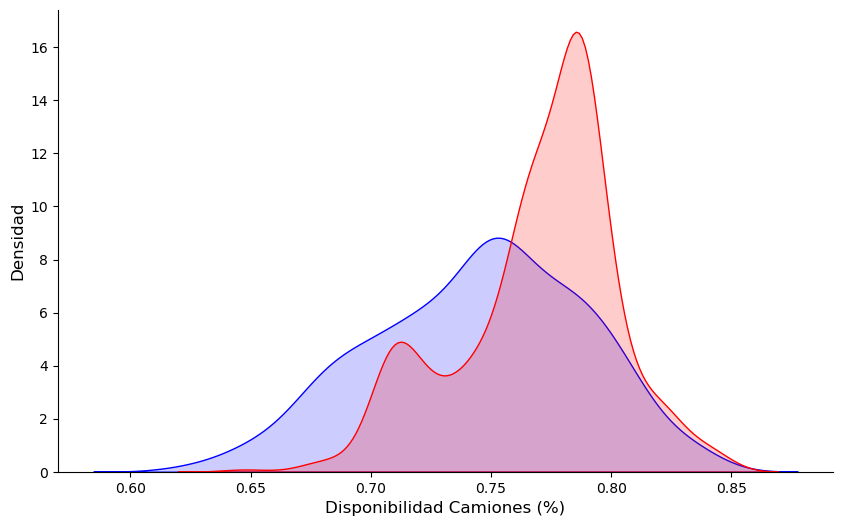

In [25]:
# Configuramos el tamaño de la figura
plt.figure(figsize=(10,6))

# Graficamos las distribuciones con estilos mejorados
sns.kdeplot(resul_interes['ta_original'], label='Original', color='blue', linewidth=1, fill=True, alpha=0.2)
sns.kdeplot(resul_interes['ta_new'], label='Nuevo', color='red', linewidth=1, fill=True, alpha=0.2)

# Mejoramos la visualización
sns.despine()

# Añadimos etiquetas de los ejes
plt.xlabel('Disponibilidad Camiones (%)', fontsize=12)
plt.ylabel('Densidad', fontsize=12)

# Formato del eje x en porcentaje
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=0))

# Ajustamos el tamaño de las etiquetas de los ejes
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Calculamos la media de cada distribución
mediana_original = resul_interes['ta_original'].median()
mediana_nueva = resul_interes['ta_new'].median()

# Añadimos líneas verticales en las medias
plt.axvline(mediana_original, color='blue', linestyle='--', linewidth=1.5)
plt.axvline(mediana_nueva, color='red', linestyle='--', linewidth=1.5)

# Añadimos texto con las medias
plt.text(mediana_original - 0.1, 9, f'Mediana Original: {mediana_original:.1%}', fontsize=10, color='blue')
plt.text(mediana_nueva + 0.03, 9, f'Mediana Nuevo: {mediana_nueva:.1%}', fontsize=10, color='red')

# Mostramos el gráfico
plt.show()

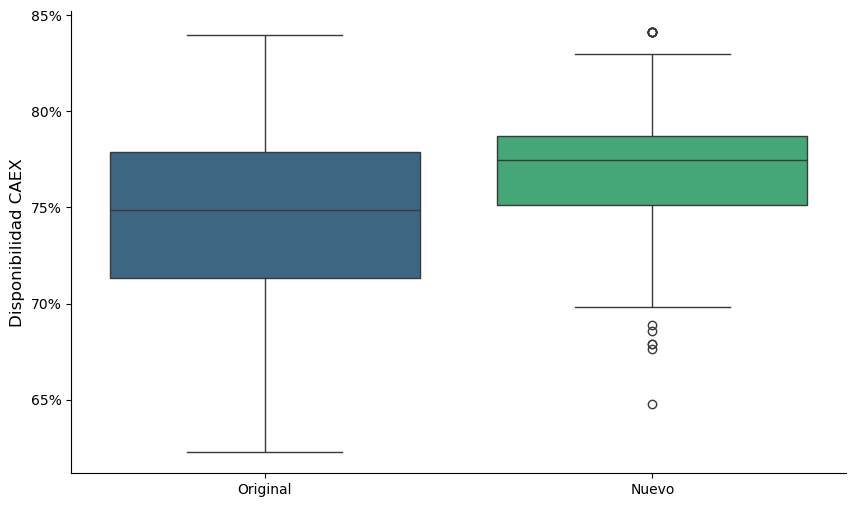

In [35]:
# Configuramos el tamaño de la figura
plt.figure(figsize=(10,6))

# Graficamos las distribuciones con estilos mejorados
sns.boxplot(data=resul_interes[['ta_original', 'ta_new']], palette='viridis')

# Mejoramos la visualización
sns.despine()

# Añadimos etiquetas de los ejes
plt.ylabel('Disponibilidad CAEX', fontsize=12)

# Formato del eje x en porcentaje
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=0))

# Ajustamos el tamaño de las etiquetas de los ejes
plt.xticks(fontsize=10, ticks=[0, 1], labels=['Original', 'Nuevo'])
plt.yticks(fontsize=10)

# Mostramos el gráfico
plt.show()

In [36]:
resul_interes['ta_new'].describe()

count    512.000000
mean       0.769217
std        0.032688
min        0.647743
25%        0.751361
50%        0.774903
75%        0.787120
max        0.841171
Name: ta_new, dtype: float64

In [37]:
resul_interes['ta_original'].describe()

count    512.000000
mean       0.744974
std        0.044094
min        0.622591
25%        0.713344
50%        0.748889
75%        0.778749
max        0.839586
Name: ta_original, dtype: float64

In [38]:
# Test de normalidad
normality_test(resul_interes['ta_original'])
normality_test(resul_interes['ta_new'])

Distibución NO Normal
Distibución NO Normal
